# Exploratory Data Analysis

Not much to be done here as we're using images and passing into a CNN without extracting any handcrafted features.

This notebook is only to get a quick idea of what the data looks like and how the images are distributed across classes. Wouldn't even call it EDA really – force of habit, and nothing better to call it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os

In [2]:
data_path = os.path.join('data', 'lfw2', 'lfw2')

In [3]:
print(f'Number of unique individuals (classes) = {len(os.listdir(data_path))}\n')

[print('\t' + name) for name in sorted(os.listdir(data_path))[:10]];
print('\t.\n\t.\n\t.\n')
[print('\t' + name) for name in sorted(os.listdir(data_path))[-10:]];

Number of unique individuals (classes) = 5749

	AJ_Cook
	AJ_Lamas
	Aaron_Eckhart
	Aaron_Guiel
	Aaron_Patterson
	Aaron_Peirsol
	Aaron_Pena
	Aaron_Sorkin
	Aaron_Tippin
	Abba_Eban
	.
	.
	.

	Zico
	Zinedine_Zidane
	Ziwang_Xu
	Zoe_Ball
	Zoran_Djindjic
	Zorica_Radovic
	Zulfiqar_Ahmed
	Zumrati_Juma
	Zurab_Tsereteli
	Zydrunas_Ilgauskas


5749 directories corresponding to each individual, containing one or several images of that individual.

In [4]:
# Number of images for each class.
count_classwise = list()

for class_ in sorted(os.listdir(data_path)):
    count_classwise.append(len(os.listdir(os.path.join(data_path, class_))))
    
count_classwise = np.array(count_classwise)

print(f'Total number of images = {np.sum(count_classwise)}')

Total number of images = 13233


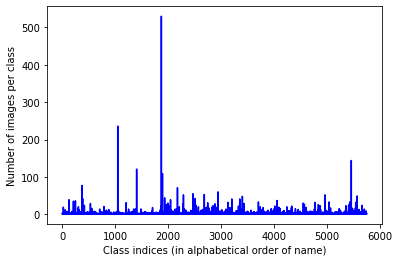

In [5]:
plt.plot(range(len(count_classwise)), count_classwise, color='b')
plt.xlabel('Class indices (in alphabetical order of name)')
plt.ylabel('Number of images per class');

Who has 500+ images?!

In [6]:
idx = np.argmax(count_classwise)
print(f'{sorted(os.listdir(data_path))[idx]}: {np.max(count_classwise)} images')

George_W_Bush: 530 images


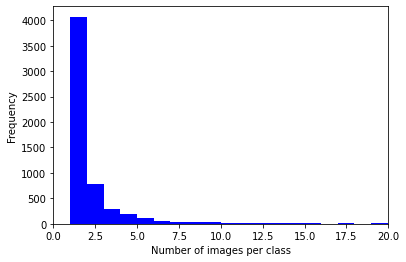

In [7]:
plt.hist(count_classwise, bins=max(count_classwise), color='b');
plt.xlim([0, 20]);
plt.xlabel('Number of images per class')
plt.ylabel('Frequency');

In [8]:
print('Statistics on number of images per class:')
print(f'\tmean = {np.round(np.mean(count_classwise), 2)}')
print(f'\tmedian = {int(np.median(count_classwise))}')
print(f'\t95th percentile value = {int(np.percentile(count_classwise, 95))}')

Statistics on number of images per class:
	mean = 2.3
	median = 1
	95th percentile value = 6


### Takeaway

An overwhelming majority of classes have between 1 and 6 images. Rare outliers like George W. Bush who has 530 images.

Initial idea of making a train-valid-test split keeping class proportions intact doesn't make sense to me for 2 reasons:
* Most of the classes have 1 image anyway.
* The objective of the FaceNet paper isn't to perform a 5749-way classification, it's to learn a generalized embedding.

Plan for train-valid-test split: <br>
* Include all classes, but keep an upper limit on the number of images in each class (say 10 images max per class?) – let's call this `data_subset`.
* From `data_subset`, extract a few sample images (and NOT a traditional elaborate 80-20 split) and use them for:
    - Face verification
    - Face recognition <br>
    Put the rest of the images for training.

ACTION ITEM: Let me know what you guys think.